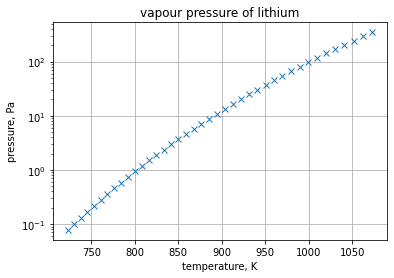

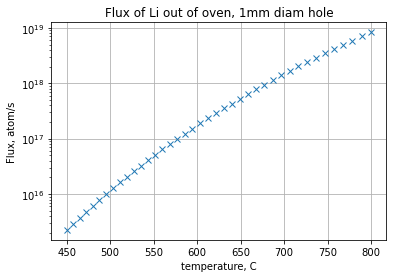

In [1]:
import numpy as np
import matplotlib.pyplot as plt
ovenHoleDiam=1e-3
ovenHoleArea=np.pi*(ovenHoleDiam/2)**2 #SI
m_Li=1.1623e-26 #kg
K_B=1.3806e-23 #botlzman, SI

def pressure_ABC(T,A,B,C):
  return 10**(A-(B/(T+C)))
@np.vectorize
def pressure_NIST(T):
  P1,P2=np.nan,np.nan
  if 298.14<=T<=1599.99:
    A,B,C=4.98831,7918.984,-9.52
    P1=pressure_ABC(T,A,B,C)
  if 1204<=T<=1353:
    A,B,C=1.58992,1603.966,-711.088
    P2=pressure_ABC(T,A,B,C)
  P_Bar=np.nanmean([P1,P2])  #these values agree
  assert np.isnan(P_Bar)==False
  P_Pa=100_000*P_Bar
  return P_Pa
def Q_Effusive(T,A=ovenHoleArea,m=m_Li):
  P=pressure_NIST(T)
  return P*A/np.sqrt(2*np.pi*m*K_B*T)

T1_C=450 #C
T2_C=800# C
T1=T1_C+273.15 #K
T2=T2_C+273.15 #K
TArr_K=np.logspace(np.log10(T1),np.log10(T2),40)
PArr=pressure_NIST(TArr_K)
plt.title('vapour pressure of lithium')
plt.ylabel('pressure, Pa')
plt.xlabel('temperature, K')
plt.semilogy(TArr_K,PArr,linewidth=0,marker='x')
plt.grid()
plt.show()
FluxArr=Q_Effusive(TArr_K)
plt.title('Flux of Li out of oven, 1mm diam hole')
plt.ylabel('Flux, atom/s')
plt.xlabel('temperature, C')
plt.semilogy(TArr_K-273.15,FluxArr,linewidth=0,marker='x')
plt.grid()
plt.show()

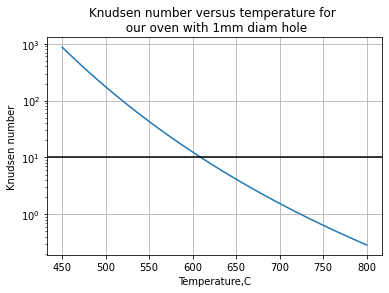

0.17553011915069153

In [7]:
#knudsend number for our oven
def meanFreePath(T):
  P=pressure_NIST(T)
  d=182e-12
  lam=K_B*T/(np.sqrt(2)*np.pi*d**2 *P)
  return lam
def knudsen(T):
  return meanFreePath(T)/ovenHoleDiam

K=knudsen(TArr_K)

plt.title("Knudsen number versus temperature for \n our oven with 1mm diam hole")
plt.xlabel('Temperature,C')
plt.ylabel('Knudsen number')
plt.semilogy(TArr_K-273.15,K)
plt.axhline(y=10,c='black')
plt.grid()
plt.show()
meanFreePath(500+273)

In [3]:
import sympy as sym
theta,theta_m=sym.symbols('theta theta_max')
func=sym.cos(theta)*sym.sin(theta)

frac=sym.integrate(func,(theta,0,.087))/sym.integrate(func,(theta,0,sym.pi/2))
frac

0.00754992267485969

In [5]:
Q_Effusive(793)*frac/1e12

159.394740011406

In [8]:
6.67e11
37e12*.0066/1e11

2.442